# Overlay Chart

This guide demonstrates how to use the `OverlayChart` function to combine multiple chart types on a single plot with optional dual y-axes.

## Introduction

The `OverlayChart` function allows you to:

- Combine different chart types (LineChart, BarChart, ScatterChart, Histogram)
- Control drawing order (first chart drawn first, subsequent charts overlay)
- Use multiple y-axes (left and right) for different scales
- Automatically detect when secondary axis is needed
- Combine legends from all charts

In [1]:
import numpy as np
from datachart.charts import LineChart, BarChart, ScatterChart, Histogram
from datachart.utils import OverlayChart

## Example 1: Bar Chart with Line Overlay (Dual Axes)

A common use case is overlaying a trend line on top of bar charts, often with different scales.

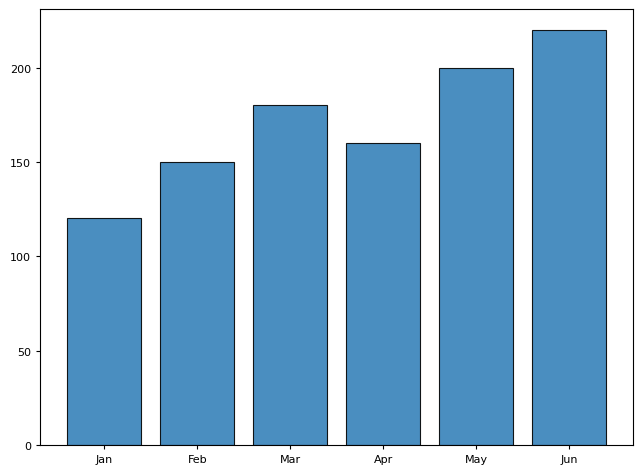

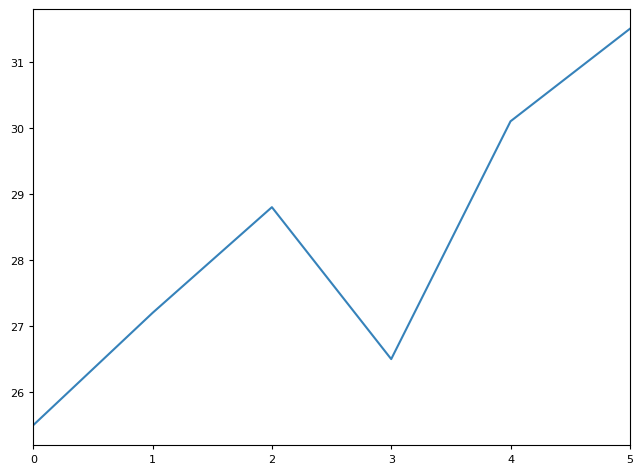

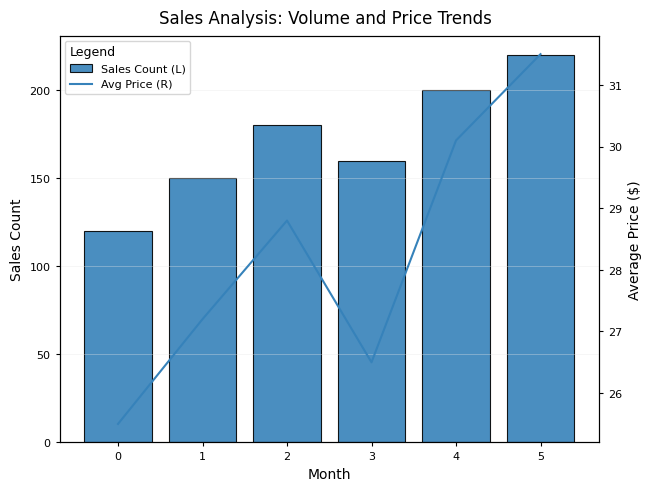

In [ ]:
# Create bar chart for sales count
bar_data = [
    {"label": "Jan", "y": 120},
    {"label": "Feb", "y": 150},
    {"label": "Mar", "y": 180},
    {"label": "Apr", "y": 160},
    {"label": "May", "y": 200},
    {"label": "Jun", "y": 220},
]
bar_fig = BarChart(data=bar_data, subtitle="Sales Count")

# Create line chart for average price (different scale)
line_data = [
    {"x": 0, "y": 25.5},
    {"x": 1, "y": 27.2},
    {"x": 2, "y": 28.8},
    {"x": 3, "y": 26.5},
    {"x": 4, "y": 30.1},
    {"x": 5, "y": 31.5},
]
line_fig = LineChart(data=line_data, style={ "plot_line_color": "red"} subtitle="Avg Price")

# Combine with explicit axis assignment
combined_fig = OverlayChart(
    charts=[
        {"figure": bar_fig, "y_axis": "left"},
        {"figure": line_fig, "y_axis": "right"},
    ],
    title="Sales Analysis: Volume and Price Trends",
    xlabel="Month",
    ylabel_left="Sales Count",
    ylabel_right="Average Price ($)",
    show_legend=True,
    show_grid="y",
)

## Example 2: Scatter Plot with Trend Line (Single Axis)

When data has similar scales, charts can share the same axis.

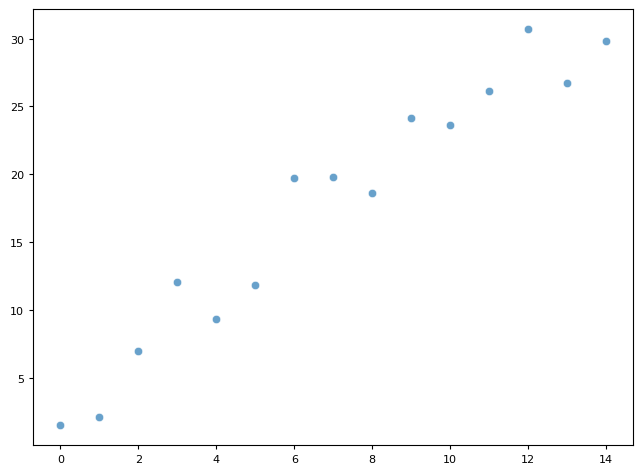

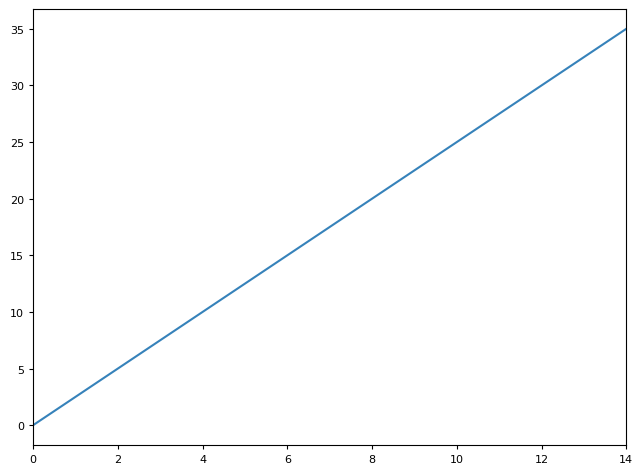

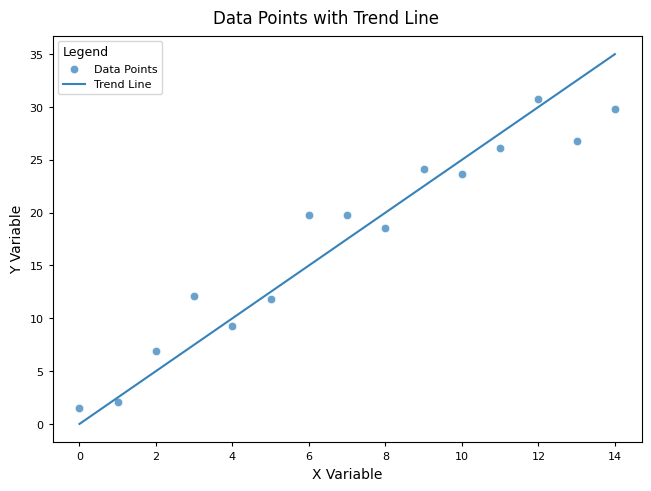

In [3]:
# Create scatter data with some noise
np.random.seed(42)
scatter_data = [
    {"x": i, "y": i * 2.5 + np.random.randn() * 3} for i in range(15)
]
scatter_fig = ScatterChart(data=scatter_data, subtitle="Data Points")

# Create trend line
line_data = [{"x": i, "y": i * 2.5} for i in range(15)]
line_fig = LineChart(data=line_data, subtitle="Trend Line")

# Combine on single axis (auto mode will detect similar scales)
combined_fig = OverlayChart(
    charts=[
        {"figure": scatter_fig},
        {"figure": line_fig},
    ],
    title="Data Points with Trend Line",
    xlabel="X Variable",
    ylabel_left="Y Variable",
    show_legend=True,
)

## Example 3: Histogram with Distribution Curve

Overlay a theoretical distribution curve on a histogram.

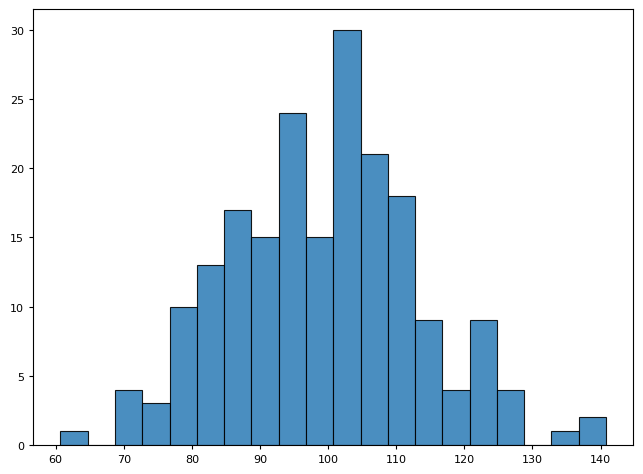

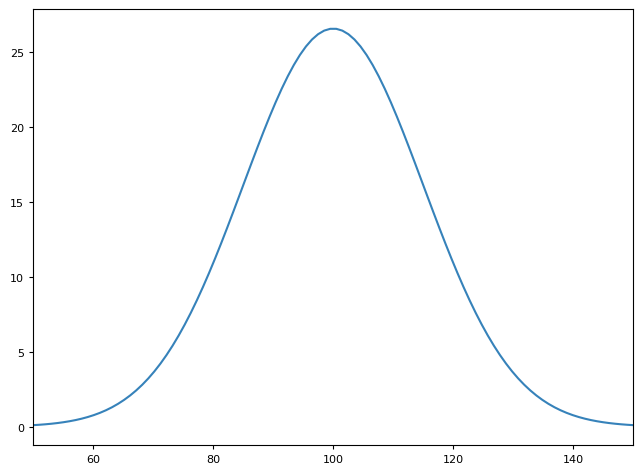

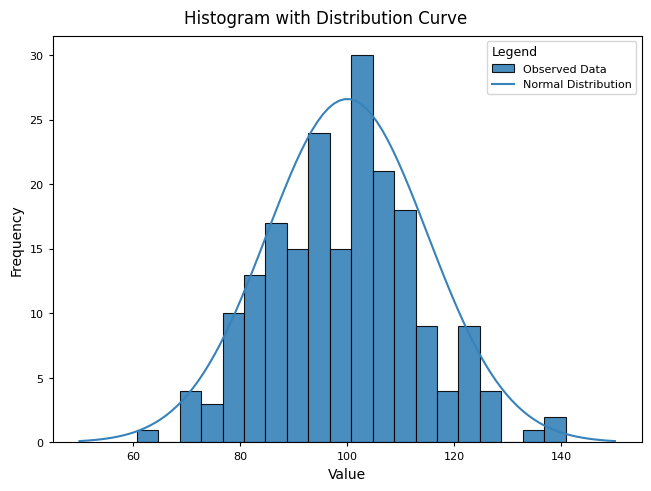

In [4]:
# Create histogram data
np.random.seed(42)
hist_data = [{"x": x} for x in np.random.normal(100, 15, 200)]
hist_fig = Histogram(data=hist_data, num_bins=20, subtitle="Observed Data")

# Create normal distribution curve
x_vals = np.linspace(50, 150, 100)
y_vals = 200 / np.sqrt(2 * np.pi * 15**2) * np.exp(-0.5 * ((x_vals - 100) / 15)**2) * 5
line_data = [{"x": x, "y": y} for x, y in zip(x_vals, y_vals)]
line_fig = LineChart(data=line_data, subtitle="Normal Distribution")

# Combine
combined_fig = OverlayChart(
    charts=[
        {"figure": hist_fig, "y_axis": "left"},
        {"figure": line_fig, "y_axis": "left"},
    ],
    title="Histogram with Distribution Curve",
    xlabel="Value",
    ylabel_left="Frequency",
    show_legend=True,
)

## Example 4: Automatic Secondary Axis Detection

Let the function automatically determine when a secondary axis is needed.

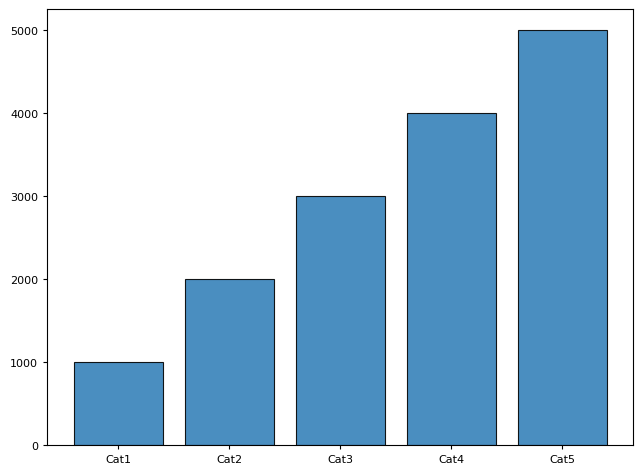

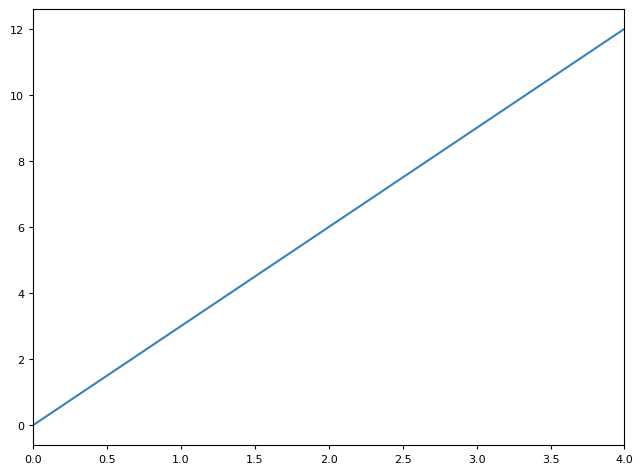

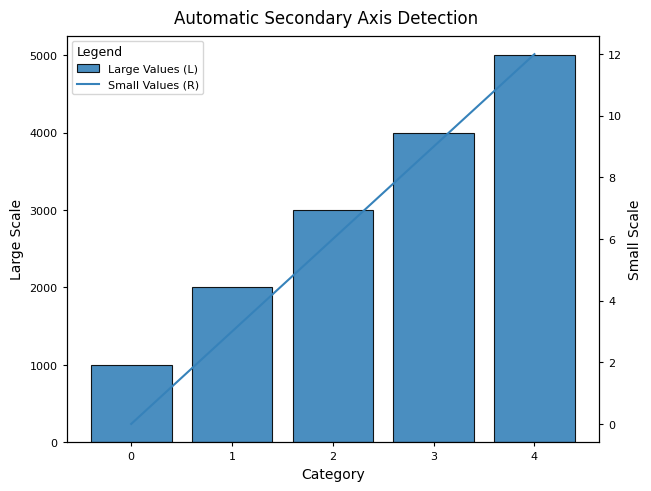

In [5]:
# Create charts with very different scales
bar_data = [{"label": f"Cat{i}", "y": i * 1000} for i in range(1, 6)]
bar_fig = BarChart(data=bar_data, subtitle="Large Values")

line_data = [{"x": i, "y": i * 3} for i in range(5)]
line_fig = LineChart(data=line_data, subtitle="Small Values")

# Use auto mode - will detect scale difference and create secondary axis
combined_fig = OverlayChart(
    charts=[
        {"figure": bar_fig},  # auto
        {"figure": line_fig},  # auto
    ],
    title="Automatic Secondary Axis Detection",
    xlabel="Category",
    ylabel_left="Large Scale",
    ylabel_right="Small Scale",
    auto_secondary_axis=3.0,  # threshold: if ratio > 3, use secondary axis
    show_legend=True,
)

## Example 5: Multiple Charts with Custom Z-Order

Control the drawing order using z-order values (higher values drawn on top).

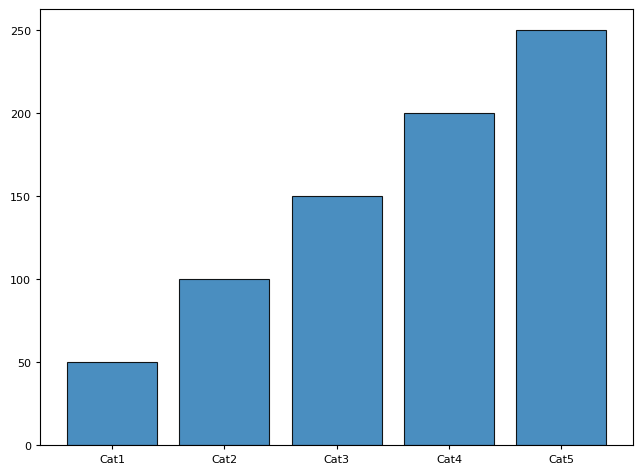

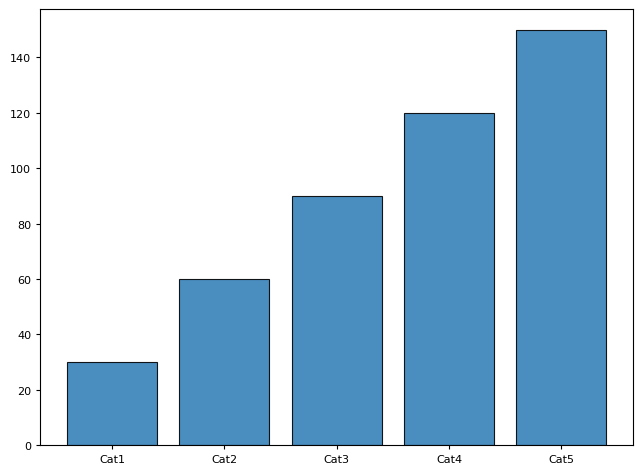

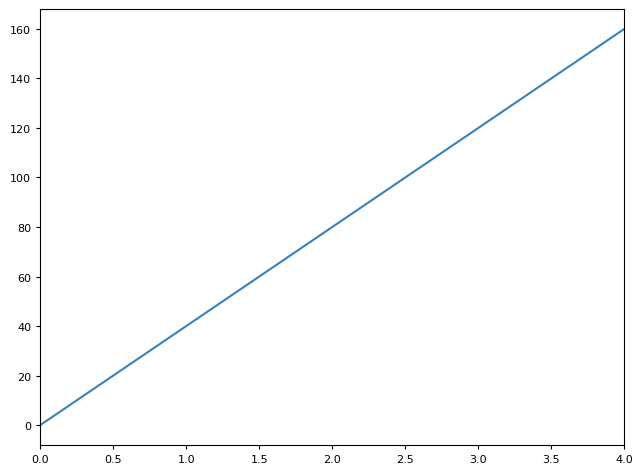

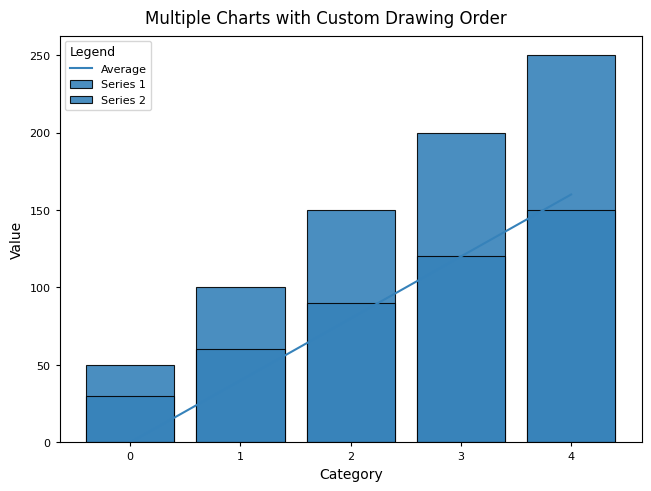

In [6]:
# Create multiple charts
bar1_data = [{"label": f"Cat{i}", "y": i * 50} for i in range(1, 6)]
bar1_fig = BarChart(data=bar1_data, subtitle="Series 1")

bar2_data = [{"label": f"Cat{i}", "y": i * 30} for i in range(1, 6)]
bar2_fig = BarChart(data=bar2_data, subtitle="Series 2")

line_data = [{"x": i, "y": i * 40} for i in range(5)]
line_fig = LineChart(data=line_data, subtitle="Average")

# Combine with explicit z-order
combined_fig = OverlayChart(
    charts=[
        {"figure": bar1_fig, "z_order": 1},  # drawn first (background)
        {"figure": bar2_fig, "z_order": 1},  # drawn second
        {"figure": line_fig, "z_order": 2},  # drawn last (foreground)
    ],
    title="Multiple Charts with Custom Drawing Order",
    xlabel="Category",
    ylabel_left="Value",
    show_legend=True,
)

## Example 6: All Chart Types Combined

Demonstrate combining all four supported chart types.

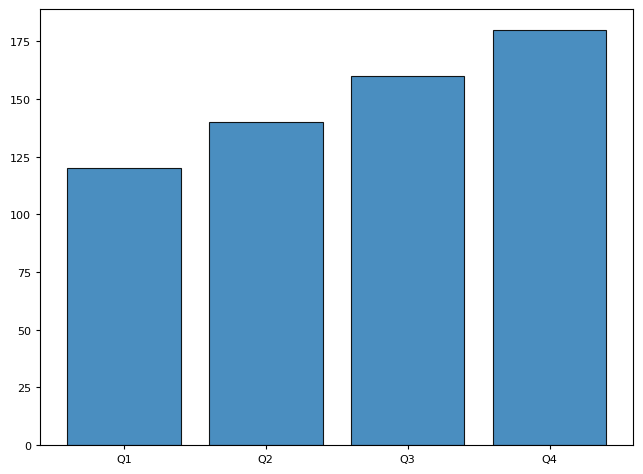

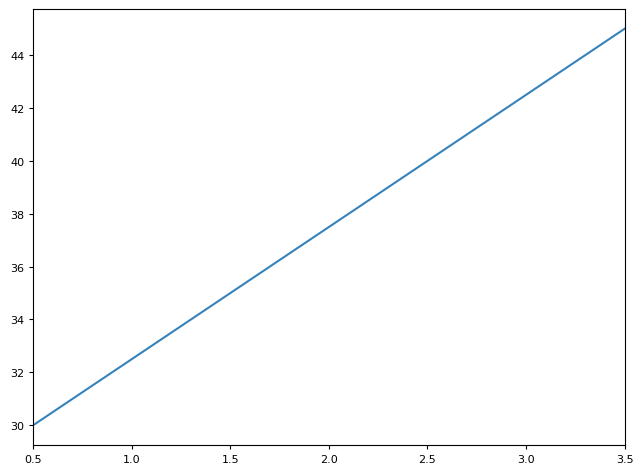

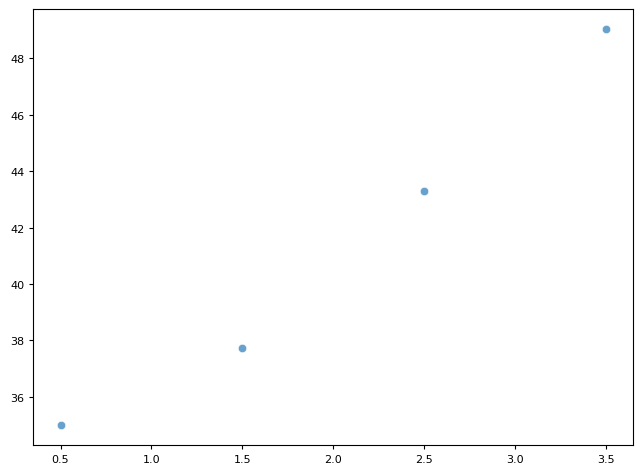

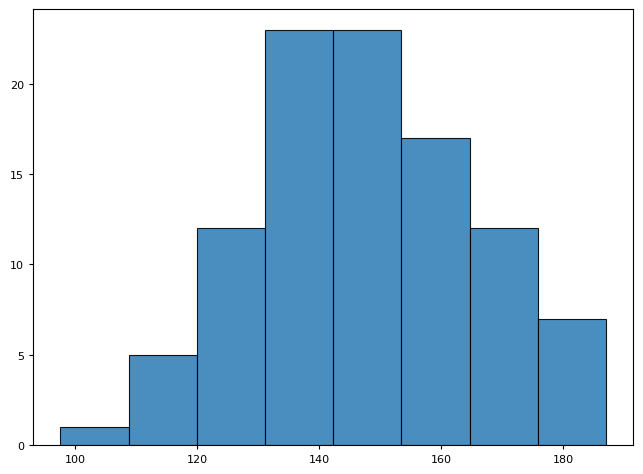

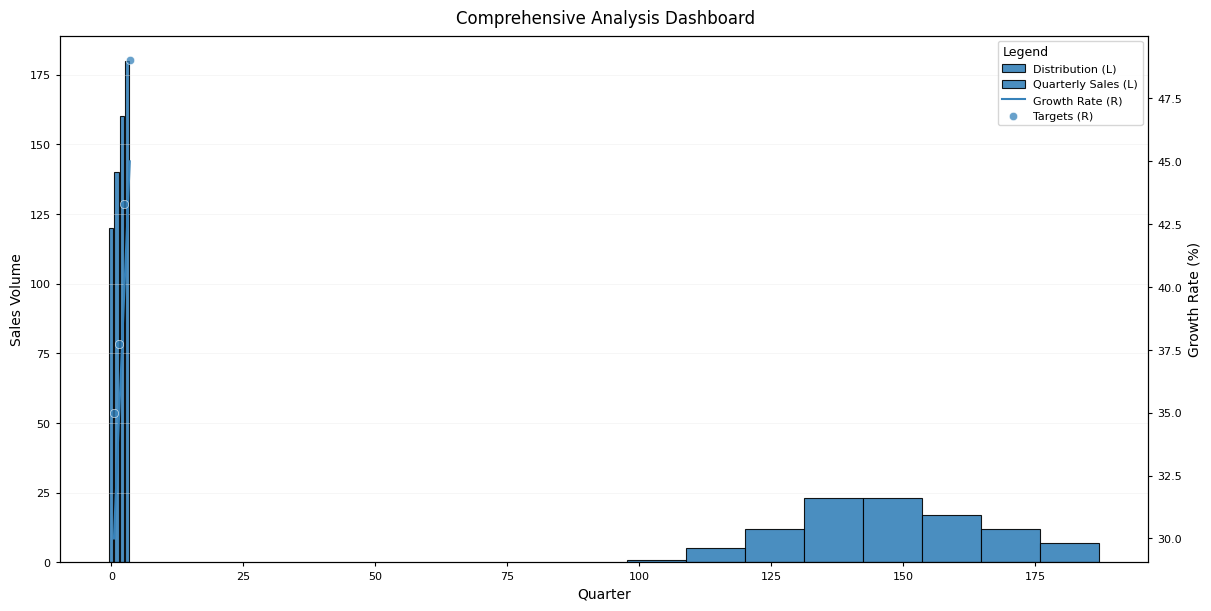

In [7]:
# Create all chart types
np.random.seed(42)

bar_data = [{"label": f"Q{i}", "y": 100 + i * 20} for i in range(1, 5)]
bar_fig = BarChart(data=bar_data, subtitle="Quarterly Sales")

line_data = [{"x": i - 0.5, "y": 25 + i * 5} for i in range(1, 5)]
line_fig = LineChart(data=line_data, subtitle="Growth Rate")

scatter_data = [{"x": i - 0.5, "y": 30 + i * 4 + np.random.randn() * 2} for i in range(1, 5)]
scatter_fig = ScatterChart(data=scatter_data, subtitle="Targets")

hist_data = [{"x": x} for x in np.random.normal(150, 20, 100)]
hist_fig = Histogram(data=hist_data, num_bins=8, subtitle="Distribution")

# Combine all with dual axes
combined_fig = OverlayChart(
    charts=[
        {"figure": bar_fig, "y_axis": "left", "z_order": 1},
        {"figure": hist_fig, "y_axis": "left", "z_order": 1},
        {"figure": line_fig, "y_axis": "right", "z_order": 2},
        {"figure": scatter_fig, "y_axis": "right", "z_order": 3},
    ],
    title="Comprehensive Analysis Dashboard",
    xlabel="Quarter",
    ylabel_left="Sales Volume",
    ylabel_right="Growth Rate (%)",
    figsize=(12, 6),
    show_legend=True,
    show_grid="y",
)

## Configuration Options

The overlay behavior can be customized using configuration options:

In [8]:
from datachart.config import config

# Adjust overlay settings
config.update_config({
    "overlay_auto_threshold": 2.5,  # More sensitive auto axis detection
    "overlay_bar_alpha": 0.6,       # More transparent bars when overlaying
    "overlay_hist_alpha": 0.5,      # More transparent histograms
    "overlay_default_zorder_bar": 1,
    "overlay_default_zorder_line": 2,
    "overlay_default_zorder_scatter": 2,
    "overlay_default_zorder_hist": 1,
})

## Function Parameters

The `OverlayChart` function accepts the following parameters:

- `charts`: List of chart configuration dictionaries, each containing:
  - `figure`: A matplotlib Figure from datachart chart functions (required)
  - `y_axis`: "left", "right", or "auto" (default: "auto")
  - `z_order`: Integer for layering control (optional)
- `title`: Title for the combined chart
- `xlabel`: Label for x-axis
- `ylabel_left`: Label for left y-axis
- `ylabel_right`: Label for right y-axis (if using dual axes)
- `figsize`: Size of the figure (width, height) in inches
- `show_legend`: Whether to show the legend (default: True)
- `show_grid`: Which grid lines to show ("x", "y", "both", or None)
- `auto_secondary_axis`: Threshold ratio for automatic secondary axis creation (default: 3.0)

## Best Practices

1. **Axis Assignment**: Use explicit `y_axis` assignment when you know the data scales differ significantly
2. **Z-Order**: Set `z_order` to control layering - bars and histograms typically have lower values (background)
3. **Legends**: Use `subtitle` parameter in individual charts to create meaningful legend labels
4. **Colors**: Colors are automatically assigned from the theme's color cycle
5. **Transparency**: When overlaying multiple bars or histograms, transparency is automatically applied
6. **Grid**: Use `show_grid="y"` for better readability with horizontal comparisons